✍ Мы начнём с **алгоритма классической линейной регрессии по методу наименьших квадратов** (OLS, Ordinary Least Squares). Данный алгоритм является базовым, но, тем не менее, весьма непрост для восприятия, поэтому данная сложносочинённая задача будет разделена на две части:

* В этом юните мы обсудим случаи и алгоритм решения неоднородных СЛАУ.
* В следующем юните подведём под эту задачу контекст задачи регрессии.

Для начала давайте вспомним, что такое **неоднородные СЛАУ.**

>**Примечание.** Совокупность уравнений первой степени, в которых каждая переменная и коэффициенты в ней являются вещественными числами, называется **системой линейных алгебраических уравнений (СЛАУ)** и в общем случае записывается как:

$$\left\{ \begin{array}{c} a_{11}x_1+a_{12}x_2+\dots +a_{1m}x_m=b_1 \\ a_{21}x_1+a_{22}x_2+\dots +a_{2m}x_m=b_2 \\ \dots \\ a_{n1}x_1+a_{n2}x_2+\dots +a_{nm}x_m=b_n \end{array} \right.\ (1),$$

где

* $n$ — количество уравнений;
* $m$ — количество переменных;
* $x_{i}$ — неизвестные переменные системы;
* $a_{ij}$ — коэффициенты системы;
* $b_{i}$ — свободные члены системы.

СЛАУ (1) называется **однородной**, если все свободные члены системы равны 0 $b_1=b_2=⋯=b_n=0$:

$$\textrm{С}\textrm{Л}\textrm{А}\textrm{У}-\textrm{о}\textrm{д}\textrm{н}\textrm{о}\textrm{р}\textrm{о}\textrm{д}\textrm{н}\textrm{а}\textrm{я},\ \textrm{е}\textrm{с}\textrm{л}\textrm{и}\ \forall b_i=0$$

Пример однородной СЛАУ:

$$\left\{\begin{array}{c} x_{1}+x_{2}=0 \\ x_{1}+2 x_{2}=0 \end{array}\right.$$

СЛАУ (1) называется **неоднородной**, если хотя бы один из свободных членов системы отличен от 0:

$$\textrm{С}\textrm{Л}\textrm{А}\textrm{У}-\textrm{н}\textrm{е}\textrm{о}\textrm{д}\textrm{н}\textrm{о}\textrm{р}\textrm{о}\textrm{д}\textrm{н}\textrm{а}\textrm{я},\ \textrm{е}\textrm{с}\textrm{л}\textrm{и}\ \exists b_i\neq 0$$

Пример неоднородной СЛАУ:

$$\left\{\begin{array}{c} x_{1}+x_{2}=1 \\ x_{1}+2 x_{2}=2 \end{array}\right.$$

Вспомним, что СЛАУ можно записать в матричном виде:

$$\begin{gathered} A \vec{w}=\vec{b} \\ \left(\begin{array}{cccc} a_{11} & a_{12} & \ldots & a_{1 m} \\ a_{21} & a_{22} & \ldots & a_{2 m} \\ \ldots & \ldots & \ldots & \ldots \\ a_{n 1} & a_{n 2} & \ldots & a_{n m} \end{array}\right)\left(\begin{array}{c} w_1 \\ w_2 \\ \ldots \\ w_m \end{array}\right)=\left(\begin{array}{c} b_1 \\ b_2 \\ \ldots \\ b_n \end{array}\right) \end{gathered}$$

где $A$ — матрица системы, $w$ — вектор неизвестных коэффициентов, а $b$ — вектор свободных коэффициентов. 

Давайте введём новое для нас определение.

**Расширенной матрицей системы $(A|b)$ неоднородных СЛАУ** называется матрица, составленная из исходной матрицы и вектора свободных коэффициентов (записывается через вертикальную черту):

$$(A \mid \vec{b})=\left(\begin{array}{cccc|c} a_{11} & a_{12} & \ldots & a_{1 m} & b_{1} \\ a_{21} & a_{22} & \ldots & a_{2 m} & b_{2} \\ \ldots & \ldots & \ldots & \ldots & \ldots \\ a_{n 1} & a_{n 2} & \ldots & a_{n m} & b_{n} \end{array}\right)$$

Расширенная матрица системы — это обычная матрица. Черта, отделяющая коэффициенты $a_{ij}$ от свободных членов $b_{i}$ — чисто символическая. 

Над расширенной матрицей неоднородной СЛАУ можно производить те же самые действия, что и над обычной, а именно:

* складывать/вычитать между собой строки/столбцы матрицы;
* умножать строки/столбцы на константу;
* менять строки/столбцы местами.

Приведём пример расширенной матрицы системы. Пусть исходная система будет следующей:

$$\left\{\begin{array}{c} w_{1}+w_{2}=1 \\ w_{1}+2 w_{2}=2 \end{array}\right.$$

Запишем её в матричном виде:

$$\begin{gathered} \left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \end{array}\right)\left(\begin{array}{l} w_1 \\ w_2 \end{array}\right)=\left(\begin{array}{l} 1 \\ 2 \end{array}\right) \\ A \vec{w}=\vec{b} \end{gathered}$$

Тогда расширенная матрица системы будет иметь вид:

$$(A \mid b)=\left(\begin{array}{ll|l} 1 & 1 & 1 \\ 1 & 2 & 2 \end{array}\right)$$

Теперь, когда мы вспомнили все определения и познакомились с термином расширенной матрицы, мы можем переходить к решению неоднородных СЛАУ.

Существует три случая при решении неоднородных СЛАУ:

* **«Идеальная пара»**

Это так называемые определённые системы линейных уравнений, имеющие единственные решения.

* **«В активном поиске»**

Неопределённые системы, имеющие бесконечно много решений.

* **«Всё сложно»**

Это самый интересный для нас случай — переопределённые системы, которые не имеют точных решений.

>**Примечание.** В данной классификации неоднородных СЛАУ допущено упрощение в терминологии. На самом деле неопределённые системы — это те, в которых независимых уравнений меньше, чем неизвестных. Они могут иметь бесконечно много решений (быть совместными) или ни одного решения (быть несовместными, если уравнения противоречат друг другу).

На практике, например в обучении регрессий, этот случай практически не встречается.

Что касается переопределённых систем, то в них, помимо несовместности (отсутствия решений), количество независимых уравнений превышает количество неизвестных — это тот самый случай, что мы видим в регрессионном анализе.

Далее мы рассмотрим каждый из случаев на примере.

# **<center>СЛУЧАЙ «ИДЕАЛЬНАЯ ПАРА»**

>Самый простой случай решения неоднородной СЛАУ — когда система имеет единственное решение. Такие системы должны быть **совместными и определёнными.**

На вопрос о том, когда СЛАУ является совместной и определённой, отвечает главная теорема СЛАУ — **теорема Кронекера — Капелли** (также её называют **критерием совместности системы**).

**Теорема Кронекера — Капелли:**

Неоднородная система линейный алгебраических уравнений $A \vec{w} = \vec{b}$ является совместной и определённой тогда и только тогда, когда ранг матрицы системы **$A$ равен** рангу расширенной матрицы системы $(A|\vec{b})$ и **равен** количеству независимых переменных :

$$rk(A) = rk(A|\vec{b}) = m \leftrightarrow \exists ! \vec{w} = (w_{1}, w_{2}, \ldots w_m)^T$$

Причём решение системы будет равно:

$$\vec{w} = A^{-1} \vec{b}$$

>**Примечание.** Здесь значок $\exists !$ переводится как «существует и причём единственное».

Сложно и непонятно? Давайте разберёмся, как работает эта теорема, на примерах ↓



**?**

Дана СЛАУ:

$$\left\{\begin{array}{c} w_1+w_2=1 \\ w_1+2 w_2=2 \end{array}\right.$$

где $w_{1}$ и $w_{2}$ — неизвестные переменные.

При решении системы «в лоб» получим:

$$\left\{\begin{array} { c } { w _ { 1 } + w _ { 2 } = 1 } \\ { w _ { 1 } + 2 w _ { 2 } = 2 } \end{array} \leftrightarrow \left\{\begin{array} { c } { w _ { 1 } + w _ { 2 } = 1 } \\ { w _ { 2 } = 1 } \end{array} \leftrightarrow \left\{\begin{array}{l} w_1=0 \\ w_2=1 \end{array}\right.\right.\right.$$

Интерпретация:

$$\left(\begin{array}{l} 1 \\ 2 \end{array}\right)=0 \cdot\left(\begin{array}{l} 1 \\ 1 \end{array}\right)+1 \cdot\left(\begin{array}{l} 1 \\ 2 \end{array}\right)$$

На языке линейной алгебры это означает что вектор $(1, 2)^T$ линейно выражается через векторы коэффициентов системы $(1, 1)^T$ и $(1, 2)^T$.

В матричном виде система запишется, как:

$$A \vec{w}=\vec{b} \quad A=\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \end{array}\right) \quad \vec{w}=\left(\begin{array}{l} w_1 \\ w_2 \end{array}\right) \quad \vec{b}=\left(\begin{array}{l} 1 \\ 2 \end{array}\right)$$

Преобразование уравнений будем таким же, как и при преобразовании расширенной матрицы системы $(A|\vec{b})$, вычитая сначала первую строку из второй, а затем — результат из первой, получим то же решение, что и решение «в лоб».

$$(A \mid \vec{b}) = \left(\begin{array}{ll|l} 1 & 1 & 1 \\ 1 & 2 & 2 \end{array}\right) \leftrightarrow \left(\begin{array}{ll|l} 1 & 1 & 1 \\ 0 & 1 & 1 \end{array}\right) \leftrightarrow \left(\begin{array}{ll|l} 1 & 0 & 0 \\ 0 & 1 & 1 \end{array}\right) = \left\{\begin{matrix} w_1 = 0 \\ w_2 = 1 \\ \end{matrix}\right.$$

Других решений у системы нет. 

Посмотрим на ранги матрицы $А$ и расширенной матрицы $(A|\vec{b})$ (количество ступеней в ступенчатых матрицах):

$$\begin{aligned} & r k(A)=\left(\begin{array}{ll} 1 & 0 \\ 0 & 1 \end{array}\right)=2 \\ & r k(A \mid b)=\left(\begin{array}{lll} 1 & 0 & 0 \\ 0 & 1 & 1 \end{array}\right)=2 \\ & r k(A)=r k(A \mid b)=2 \end{aligned}$$

Они совпадают и равны количеству неизвестных, а это и гарантирует существование и единственность решения. То есть в общем случае, чтобы узнать, сколько решений существует у системы, её необязательно было бы решать — достаточно было бы найти ранги матриц $A$ и $(A | b)$.

?
Тут возникает вопрос: «Можно ли найти решение одной формулой?»

Для удобства перепишем систему без стрелок:

$$Aw = b$$

Так как матрица квадратная и невырожденная, у неё обязательно есть обратная матрица.

Умножим на $A^{-1}$ слева обе части уравнения. Стоит напомнить, что произведение матриц не перестановочно, поэтому есть разница, с какой стороны умножать.

$$A^{-1} Aw = A^{-1}b$$

$$w = A^{-1} b$$

>**Важно!** Отсюда явно видны **ограничения** этого метода: его можно применять только для квадратных невырожденных матриц (тех, у которых определитель не равен 0).

Убедимся в правильности формулы. Найдём произведение матрицы $A^{-1}$ и вектора-столбца $b$:

$$A^{-1} b=\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \end{array}\right)^{-1}\left(\begin{array}{l} 1 \\ 2 \end{array}\right)=\left(\begin{array}{cc} 2 & -1 \\ -1 & 1 \end{array}\right)\left(\begin{array}{l} 1 \\ 2 \end{array}\right)=\left(\begin{array}{l} 0 \\ 1 \end{array}\right)$$

Меняем местами главную диагональ и меняем знаки у побочной. Как видим, результат совпал с прошлым методом.

**Резюмируем ↓**

У нас есть квадратная система с $m$ неизвестных. Если ранг матрицы коэффициентов $A$ **равен** рангу расширенной матрицы $(A | b)$ и **равен** количеству переменных ($rk(A)=rk(\vec{b})=m$), то в системе будет ровно столько независимых уравнений, сколько и неизвестных $m$, а значит будет **единственное** решение.

Вектор свободных коэффициентов $b$ при этом линейно зависим со столбцами матрицы $A$, его разложение по столбцам $A$ единственно.

## **<center>СЛУЧАЙ «В АКТИВНОМ ПОИСКЕ»**

?
А что, если система не удовлетворяет теореме Кронекера — Капелли? То есть ранг матрицы системы равен расширенному рангу матрицы, но не равен количеству неизвестных. Неужели тогда система нерешаема?

На этот вопрос отвечает первое следствие из теоремы ↓

**Следствие №1 из теоремы Кронекера — Капелли:**

Если ранг матрицы системы $A$ равен рангу расширенной матрицы системы $(A|\vec{b})$, $но$ меньше, чем количество неизвестных $m$, то система имеет бесконечное множество решений:

$$rk(A) = rk(A | \vec{b}) < m  \leftrightarrow  \infty \ решений$$

Вновь рассмотрим пример.



?

Решим систему уравнений:

$$w_1 + w_2 + w_3 = 10$$

Да, уравнение одно, но формально оно является неоднородной СЛАУ.

Итак, мы имеем одно уравнение на три неизвестных, значит две координаты из трёх вектора $w$ мы можем задать как угодно. Например, зададим вторую и третью как $alpha$ и $\beta$. Тогда первая будет равна $10 - \alpha - \beta$.

$$w=\left(\begin{array}{c} 10-\alpha-\beta \\ \alpha \\ \beta \end{array}\right) \alpha, \beta \in R$$

Вместо переменных $alpha$ и $\beta$ мы можем подставлять любые числа и всегда будем получать равенство. 

Составим расширенную матрицу:

$$(A \mid \vec{b})=\left(\begin{array}{lll} 1 & 1 & 1 \mid 10 \end{array}\right)$$

Её ранг, как и ранг $A$, равен 1, что меньше числа неизвестных $m=3$:

$$rk(A) = rk(A | \vec{b}) = 1 < 3$$

Такая ситуация, по следствию из теоремы Кронекера — Капелли, говорит о существовании и не единственности решения, то есть решений бесконечно много.

**Резюмируем ↓**

Если ранги матриц $A$ и $(A|\vec{b})$ всё ещё совпадают, но уже меньше количества неизвестных ($rk(A) = rk(A | \vec{b}) < m$), значит, уравнений не хватает для того, чтобы определить систему полностью, и решений будет бесконечно много.

На языке линейной алгебры это значит, что вектор $\vec{b}$ линейно зависим со столбцами матрицы $A$, но также и сами столбцы зависимы между собой, поэтому равнозначного разложения не получится, т. е. таких разложений может быть сколько угодно.


СЛУЧАЙ «ВСЁ СЛОЖНО»

А теперь посмотрим на самый интересный для нас случай. Его формально регламентирует второе следствие из теоремы Кронекера — Капелли.

**Следствие №2 из теоремы Кронекера — Капелли:**

Если ранг матрицы системы $A$ меньше, чем ранг расширенной матрицы системы $(A|\vec{b})$, то система несовместна, то есть не имеет точных решений:

$$rk(A)  < rk(A | \vec{b})  \leftrightarrow  \nexists \ решений$$

?

Решим систему уравнений:

$$\left\{\begin{array}{c} w_1+w_2=1 \\ w_1+2 w_2=2 \\ w_1+w_2=12 \end{array}\right.$$

Посмотрим на первое и третье уравнение — очевидно, что такая система не имеет решений, так как данные уравнения противоречат друг другу.

Но давайте обоснуем это математически. Для этого запишем расширенную матрицу системы:

$$(A \mid \vec{b})=\left(\begin{array}{cc|c} 1 & 1 & 1 \\ 1 & 2 & 2 \\ 1 & 1 & 12 \end{array}\right)$$

Посчитаем ранги матриц $A$ и $(A|\vec{b})$:

$$\begin{gathered} r k(A)=r k\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \\ 1 & 1 \end{array}\right)=[\text { вычёркиваем } I I I]= \\ =r k\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \end{array}\right)=[I I-I]=r k\left(\begin{array}{ll} 1 & 1 \\ 0 & 1 \end{array}\right)=2 \\ r k(A \mid \vec{b})=r k\left(\begin{array}{ccc} 1 & 1 & 1 \\ 1 & 2 & 2 \\ 1 & 1 & 12 \end{array}\right)=[I I I-I, I I-I]=r k\left(\begin{array}{ccc} 1 & 1 & 1 \\ 0 & 1 & 1 \\ 0 & 0 & 11 \end{array}\right)=3 \end{gathered}$$

Итак, $rk(A)=2$, в то время как $rk(A|\vec{b})=3$. Это и есть **критерий переопределённости** системы уравнений: ранг матрицы системы меньше ранга расширенной матрицы системы.

→ Получается, что идеальное решение найти нельзя, но чуть позже мы увидим, что такие системы возникают в задачах регрессии практически всегда, а значит нам всё-таки хотелось бы каким-то образом её решать. Можно попробовать найти приблизительное решение — вопрос лишь в том, какое из всех этих решений лучшее.

**?**

Найдем наилучшее приближение для $w_{1}$, $w_{2}$, если:

$$\left\{\begin{array}{l} w_1+w_2=1 \\ w_1+2 w_2=2 \text { или } \\ w_1+w_2=12 \end{array}\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \\ 1 & 1 \end{array}\right) \cdot\left(\begin{array}{l} w \\ w \end{array}\right)=\left(\begin{array}{c} 1 \\ 2 \\ 12 \end{array}\right)\right.$$

Обозначим приближённое решение как $\hat{w}$. Приближением для вектора $b$ будет $\hat{b} = A \hat{w}$. Также введём некоторый вектор ошибок $e = b - \hat{b} = b - A \hat{w}$.

>**Примечание.** Здесь мы снова опустили стрелки у векторов $b$, $\hat{b}$ и $\hat{w}$ для наглядности.

Например, если мы возьмём в качестве вектора $\hat{w}$ вектор $\hat{w}_1=(1, 1)^T$, то получим:

$$\begin{gathered} \hat{b}=A \widehat{w}_1=\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \\ 1 & 1 \end{array}\right) \cdot\left(\begin{array}{l} 1 \\ 1 \end{array}\right)=\left(\begin{array}{l} 2 \\ 3 \\ 2 \end{array}\right) \\ e_1=b-A \widehat{w}_1=\left(\begin{array}{c} 1 \\ 2 \\ 12 \end{array}\right)-\left(\begin{array}{l} 2 \\ 3 \\ 2 \end{array}\right)=\left(\begin{array}{c} -1 \\ -1 \\ 10 \end{array}\right) \end{gathered}$$

Теперь возьмём в качестве вектора $\hat{w}_2 = (4, -1)^T$, получим:

$$\begin{gathered} \hat{b}=A \widehat{w}_2=\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \\ 1 & 1 \end{array}\right) \cdot\left(\begin{array}{c} 4 \\ -1 \end{array}\right)=\left(\begin{array}{l} 3 \\ 2 \\ 3 \end{array}\right) \\ e_2=b-A \widehat{w}_2=\left(\begin{array}{c} 1 \\ 2 \\ 12 \end{array}\right)-\left(\begin{array}{l} 3 \\ 2 \\ 3 \end{array}\right)=\left(\begin{array}{c} -2 \\ 0 \\ 9 \end{array}\right) \end{gathered}$$

→ Конечно, нам хотелось бы, чтобы ошибка была поменьше. Но какая из них поменьше? Векторы сами по себе сравнить нельзя, но зато можно сравнить их длины.

Для первого случая будем иметь:

$$\left\|e_1 \right\| = \sqrt{(-1)^2 + (-1)^2 + (10)^2} = \sqrt{102}$$

Для второго случая:

$$\left\|e_2 \right\| = \sqrt{(-2)^2 + 0^2 + 9^2} = \sqrt{85}$$

Видно, что вторая ошибка всё-таки меньше, соответственно, приближение лучше. Но в таком случае из всех приближений нам нужно выбрать то, у которого длина вектора ошибок минимальна, если, конечно, это возможно.

$$\left\|e \right\| \rightarrow min$$

Мы вернёмся к этой задаче чуть позже, а пока выполните **несколько заданий** на проверку понимания второго следствия теоремы Кронекера — Капелли ↓

Вернёмся к задаче поиска оптимальных приближений вектора $\hat{w}$.

>**Примечание.** Проблема поиска оптимальных приближённых решений неоднородных переопределённых СЛАУ стояла у математиков вплоть до XIX века. До этого времени математики использовали частные решения, зависящие от вида уравнений и размерности. Впервые данную задачу для общего случая решил Гаусс, опубликовав метод решения этой задачи, который впоследствии будет назван методом наименьших квадратов (МНК). В дальнейшем Лаплас прибавил к данному методу теорию вероятности и доказал оптимальность МНК-оценок с точки зрения статистики.

Сейчас мы почувствуем себя настоящими математиками и попробуем решить эту задачу самостоятельно с помощью простой геометрии и знакомых нам операций над матрицами.

Вспомним, что на языке линейной алгебры неразрешимость системы

$$\left(\begin{array}{ll} 1 & 1 \\ 1 & 2 \\ 1 & 1 \end{array}\right) \cdot\left(\begin{array}{l} w \\ w \end{array}\right)=\left(\begin{array}{c} 1 \\ 2 \\ 12 \end{array}\right)$$

означает, что попытка выразить вектор $(1, 2, 12)^T$ через $(1, 1, 1)^T$ и $(1,2,1)^T$ не будет успешной, так как они линейно независимы.

**Геометрически** это означает, что вектор свободных коэффициентов $b$ (коричневый) не лежит в одной плоскости со столбцами матрицы $A$ (синие векторы).

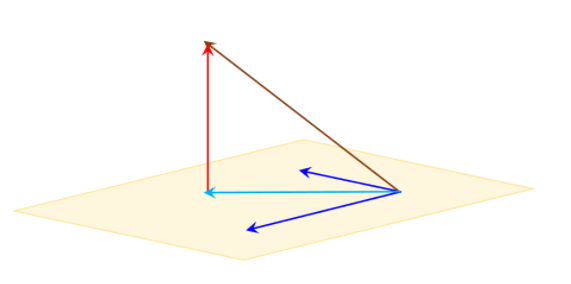

→ Напомним, что подобную задачу мы решали в предыдущем модуле по линейной алгебре, в юните «Практика: векторы». Вы можете вернуться в предыдущий модуль и освежить в памяти решение задачи.

Идея состояла в том, что наилучшим приближением для коричневого вектора будет ортогональная проекция на синюю плоскость — **голубой вектор**. Так происходит потому, что наименьший по длине вектор ошибок — **красный** — должен быть перпендикулярен к синей плоскости:

$$e = b - \hat{b}$$

В прошлом модуле мы производили расчёты интуитивно, а теперь настала пора вывести формулу.

Давайте умножим наши уравнения слева на $A^T$:

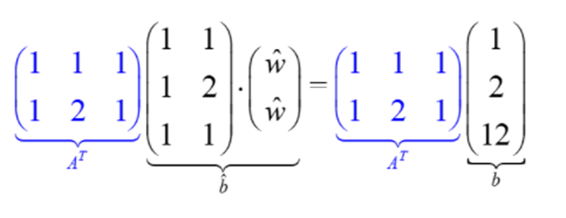

Идея заключается в следующем: справа мы найдём скалярное произведение столбцов матрицы $A$ на вектор $b$, а слева — произведение столбцов $A$ на приближённый вектор $\hat{b}$ (по сути, на голубую проекцию).

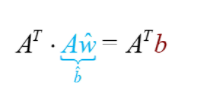

Упростим уравнение, перемножив всё, что содержит только числа. В левой части умножим $A^T$ на $A$, в правой — умножим $A^T$ на $b$. Тогда слева получим матрицу 2×2 — это не что иное, как матрица Грама столбцов $A$.

Столбцы $A$ линейно независимы, а это значит, что, по свойству матрицы Грама, $A^{T} \cdot A$  — невырожденная квадратная матрица (её определитель не равен нулю, и для неё существует обратная матрица). Получившаяся система — один в один случай «идеальная пара» (ранг матрицы, как и ранг расширенной матрицы, равен 2, в чём несложно убедиться), а это значит, что теперь мы можем её решить.

$$\begin{gathered} \left(\begin{array}{ll} 3 & 4 \\ 4 & 6 \end{array}\right) \cdot\left(\begin{array}{l} \widehat{w} \\ \widehat{w} \end{array}\right)=\left(\begin{array}{l} 15 \\ 17 \end{array}\right) \\ \left(\begin{array}{ll} 3 & 4 \\ 4 & 6 \end{array}\right) \text { - матрица Грама столбцов } A . \\ A^T \cdot A=\operatorname{Gram}\left(\left(\begin{array}{l} 1 \\ 1 \\ 1 \end{array}\right),\left(\begin{array}{l} 1 \\ 2 \\ 1 \end{array}\right)\right) \end{gathered}$$

**?**

Но ведь мы не могли решить изначальную задачу, так как она была переопределена, а эту — можем. **Как так получилось?**

Мы потребовали, чтобы у приближения $\hat{b}$ были с векторами $(1, 1, 1)^T$ и $(1, 2, 1)^T$ такие же скалярные произведения, как у $b$. Это и означает что $\hat{b}$ — ортогональная проекция на нашу синюю плоскость, в которой лежат столбцы матрицы $A$, и в этой плоскости мы можем найти коэффициенты.

Мы с вами отлично умеем решать системы типа «Идеальная пара». Для этого нам нужно найти обратную матрицу $(A^{T}A)^{-1}$ и умножить на неё слева всё уравнение. Так мы и получим наше приближение:

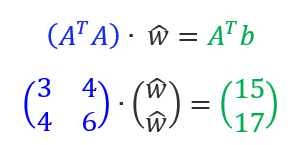

Находим определитель матрицы ($(A^{T} A)$):

$$det(A^T A) = 3 \cdot 6 - 4 \cdot 4 = 2$$

Находим обратную матрицу $(A^{T}A)^{-1}$:

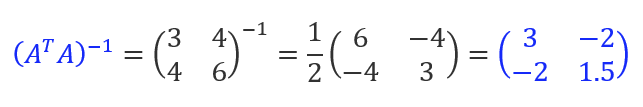

Умножаем всё уравнение на обратную матрицу слева:

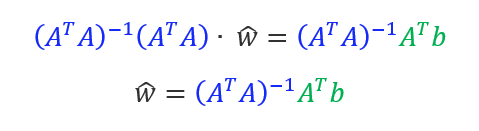

И, наконец, вот он — долгожданный приближённый вектор $\hat{w}$:

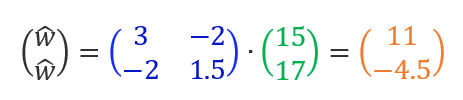

Ещё раз посмотрим на финальную формулу:

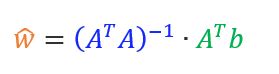

⭐ Пришло время открытий!

Только что мы геометрическим образом вывели формулу оценки решения методом наименьших квадратов (МНК или OLS, Ordinary Least Squares).

**Примечание.** Стоит отметить, что полученная матричная формула не зависит от размерностей и конкретных значений, а значит применима не только в нашем локальном случае, но и в общем.

Нам осталось выполнить проверку полученных результатов, чтобы убедиться в верности решения.

Вычислим голубой вектор $\hat{b}$. Для этого возьмём линейную комбинацию столбцов матрицы А с найденными нами коэффициентами $\hat{w}_1$ и $\hat{w}_2$:

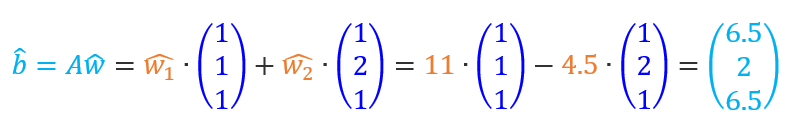

Вычислим вектор ошибок $e$:

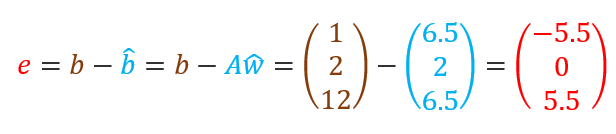

Убедимся, что данный вектор действительно ортогонален столбцам матрицы $А$. Для этого найдём их скалярные произведения:

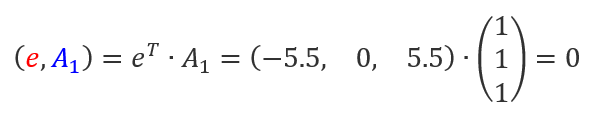

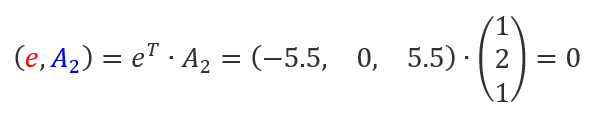

Скалярные произведения равны 0, а это означает, что **вектор ошибок** $e$ действительно ортогонален всей синей плоскости, а **голубой вектор** $\hat{b}$ приближённого значения является ортогональной проекцией коричневого вектора .

**Примечание.** Прежде чем перейти к выводам, стоит отметить, что обычно OLS-оценку выводят немного иначе, а именно минимизируя в явном виде длину вектора ошибок по коэффициентам , вернее, даже квадрат длины для удобства вычисления производных.

$$\left\|\vec{e} \right\| \rightarrow min$$

$$\left\|\vec{e} \right\|^2 \rightarrow min$$

$$\left\|\vec{b} - A \vec{w} \right\|^2 \rightarrow min$$

Формула получится точно такой же, какая есть у нас, просто способ вычислений будет не геометрический, а аналитический. Мы вернёмся к этому способу, когда будем обсуждать оптимизацию функции многих переменных в разделе по математическому анализу.

Наконец, мы может подвести итоги для случая «Всё сложно».

**Резюмируем ↓**

Если ранг матрицы $A$ меньше ранга расширенной системы $(A|\vec{b})$, то независимых уравнений больше, чем переменных $(rkA<rk(A|\vec{b})<m)$, а значит некоторые из них будут противоречить друг другу, то есть решений у системы нет.

Говоря на языке линейной алгебры, вектор $b$ линейно независим со столбцами матрицы $A$, а значит его нельзя выразить в качестве их линейной комбинации.

Однако можно получить приближённые решения по методу наименьших квадратов ($OLS-оценка - \hat{b} = (A^{T}A)^{-1}\cdot A^{T} b$), идеей которого является ортогональная проекция вектора $b$ на столбцы матрицы $A$.

In [9]:
import numpy as np

A = np.array([[4, 7, -1], [-4, 2, 5], [0, 9, 4]])
b = np.array([[4, 7, -1, 7], [-4, 2, 5, 3], [0, 9, 4, 10]])
c = np.array([7,3,10])
print(A)
print(np.linalg.matrix_rank(A))
print(b)
print(np.linalg.matrix_rank(b))

[[ 4  7 -1]
 [-4  2  5]
 [ 0  9  4]]
2
[[ 4  7 -1  7]
 [-4  2  5  3]
 [ 0  9  4 10]]
2


In [23]:
new_array = np.append(A, c.reshape(3,1), axis= 1 )
new_array

array([[ 4,  7, -1,  7],
       [-4,  2,  5,  3],
       [ 0,  9,  4, 10]])

In [22]:
c.reshape(3,1)

array([[ 7],
       [ 3],
       [10]])

In [28]:
A1 = np.array([[1, 1], [1, 2], [1, 1]])
c1 = np.array([1, 2, 12])

In [132]:
def number_of_solutions(A,b):
    ext_matrix = np.append(A, b.reshape(b.shape[0],1), axis= 1 )
    n_elem = A.shape[1]
    rank_A = np.linalg.matrix_rank(A)
    rank_ext_A = np.linalg.matrix_rank(ext_matrix)
    
    if rank_A == rank_ext_A == n_elem:
        print("There is 1 solution")
    elif  rank_A == rank_ext_A < n_elem:
        print("An infinite number of solutions")
    else:
        print("Not solutions")
        g = A.T@A
        g_inv = np.linalg.inv(g)
        result = g_inv@(A.T@b)
        print(f"OLS solutions:{result}")
        vec_pred = np.zeros(A.shape[0])
        for i in range(n_elem):
            vec_pred = vec_pred + A[:,i]*result[i]
        err =b - vec_pred
        print(f"Error vector{err}")
            

In [133]:
number_of_solutions(A,c)

An infinite number of solutions


In [134]:
number_of_solutions(A1,c1)

Not solutions
OLS solutions:[11.  -4.5]
Error vector[-5.5  0.   5.5]


In [135]:
A2 = np.array([[1, -5], [2, 1], [1, 1]])
b2 = np.array([1, 2, 2])
e = np.array([1,1])

vec_pred = np.zeros(A2.shape[0])
for i in range(A2.shape[1]):
    print(A2[:,i]*e[i])
    vec_pred = vec_pred + A2[:,i]*e[i]
err = b2 - vec_pred
print(f"Error vector{err}")

[1 2 1]
[-5  1  1]
Error vector[ 5. -1.  0.]


In [136]:
number_of_solutions(A2,b2)

Not solutions
OLS solutions:[1.1835443  0.05063291]
Error vector[ 0.06962025 -0.41772152  0.76582278]


In [137]:
def number_of_solutions1(A,b):
    ext_matrix = np.append(A, b.reshape(b.shape[0],1), axis= 1 )
    n_elem = A.shape[1]
    rank_A = np.linalg.matrix_rank(A)
    rank_ext_A = np.linalg.matrix_rank(ext_matrix)
    
    if rank_A == rank_ext_A == n_elem:
        print("There is 1 solution")
    elif  rank_A == rank_ext_A < n_elem:
        print("An infinite number of solutions")
    else:
        print("Not solutions")
        g = A.T@A
        g_inv = np.linalg.inv(g)
        result = g_inv@(A.T@b)
        print(f"OLS solutions:{result}")
        vec_pred = np.zeros(A.shape[0])
        for i in range(n_elem):
            vec_pred = vec_pred + A[:,i]*result[i]
        err =b - vec_pred
        print(f"Error vector{err}")
A3 = np.array([[1, 2], [-3, 1], [1, 2], [1, -1]])
b3 = np.array([1, 4, 5, 0])

number_of_solutions1(A3,b3)

Not solutions
OLS solutions:[-0.5  1.6]
Error vector[-1.7  0.9  2.3  2.1]
